# EXPLORATORY DATA ANALYSIS

Let's review our objectives.

## Objectives:

* Does account length affect customer churn behavior? 
* Determine the relationship between customer churn behavior and international plan.
* What is the relationship between the number of voicemail messages and customer churn? What is the role of voicemail plan in this relationship?
* Compare the effects of different kind of charges on customer churn.
* What is the relationship between customer service calls and customer churn?
* Finalize the dataset for classification modeling.

## IMPORT DATA

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 7)});
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [41]:
df = pd.read_csv('CSV_Files/customer_churn_data_cleaned.csv').drop('Unnamed: 0', axis=1)
df.head(20)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,night_call_length_per_call,intl_call_length_per_call,day_charge_per_min,eve_charge_per_min,night_charge_per_min,intl_charge_per_min,day_charge_percentage,eve_charge_percentage,night_charge_percentage,intl_charge_percentage
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,2.689,3.333,0.17,0.085,0.045,0.270,0.593,0.221,0.145,0.036
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,2.470,4.567,0.17,0.085,0.045,0.270,0.466,0.282,0.194,0.063
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,1.563,2.440,0.17,0.085,0.045,0.270,0.667,0.166,0.118,0.053
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,2.212,0.943,0.17,0.085,0.045,0.270,0.760,0.079,0.132,0.027
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,1.545,3.367,0.17,0.085,0.045,0.270,0.545,0.242,0.162,0.052
5,AL,118,510,1,0,0,223.4,98,37.98,220.6,...,1.728,1.050,0.17,0.085,0.045,0.270,0.559,0.276,0.135,0.025
6,MA,121,510,0,1,24,218.2,88,37.09,348.5,...,1.802,1.071,0.17,0.085,0.045,0.271,0.476,0.380,0.123,0.026
7,MO,147,415,1,0,0,157.0,79,26.69,103.1,...,2.206,1.183,0.17,0.085,0.045,0.270,0.568,0.186,0.203,0.041
8,LA,117,408,0,0,0,184.5,97,31.37,351.6,...,2.398,2.175,0.17,0.085,0.045,0.270,0.430,0.409,0.133,0.032
9,WV,141,415,1,1,37,258.6,84,43.96,222.0,...,3.365,2.240,0.17,0.085,0.045,0.270,0.543,0.233,0.181,0.037


Check columns, null values and data types with _.info()_ method.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   state                         3333 non-null   object 
 1   account_length                3333 non-null   int64  
 2   area_code                     3333 non-null   int64  
 3   international_plan            3333 non-null   int64  
 4   voice_mail_plan               3333 non-null   int64  
 5   number_vmail_messages         3333 non-null   int64  
 6   total_day_minutes             3333 non-null   float64
 7   total_day_calls               3333 non-null   int64  
 8   total_day_charge              3333 non-null   float64
 9   total_eve_minutes             3333 non-null   float64
 10  total_eve_calls               3333 non-null   int64  
 11  total_eve_charge              3333 non-null   float64
 12  total_night_minutes           3333 non-null   float64
 13  tot

NonChurn and Churn Customer Numbers:
 0    2850
1     483
Name: churn, dtype: int64
NonChurn and Churn Customer Percentage:
 0    0.86
1    0.14
Name: churn, dtype: float64


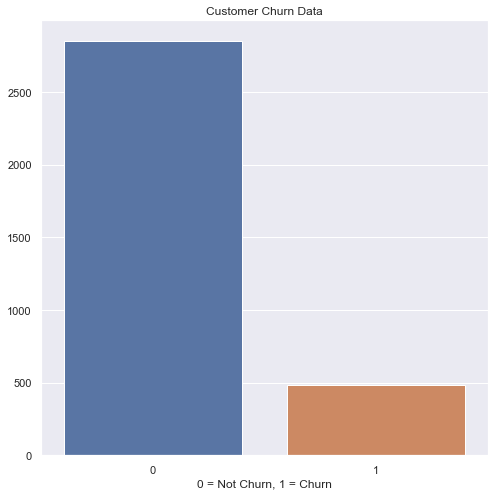

In [43]:
print('NonChurn and Churn Customer Numbers:\n', df['churn'].value_counts())
print('NonChurn and Churn Customer Percentage:\n', round(df['churn'].value_counts(normalize=True),2))
churn  = round(df['churn']).value_counts()
plt.figure(figsize=(8,8))
sns.barplot(churn.index, churn.values)
plt.title('Customer Churn Data')
plt.xlabel('0 = Not Churn, 1 = Churn')
plt.show();

Out of 3333 customer 483 of them churn which is equivalent of 14%. Let's continue our research with statistical analysis of the dataset.

In [44]:
round(df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.065,39.822,1.000,74.000,101.000,127.000,243.000
area_code,3333.0,437.182,42.371,408.000,408.000,415.000,510.000,510.000
international_plan,3333.0,0.097,0.296,0.000,0.000,0.000,0.000,1.000
voice_mail_plan,3333.0,0.277,0.447,0.000,0.000,0.000,1.000,1.000
number_vmail_messages,3333.0,8.099,13.688,0.000,0.000,0.000,20.000,51.000
total_day_minutes,3333.0,179.775,54.467,0.000,143.700,179.400,216.400,350.800
total_day_calls,3333.0,100.436,20.069,0.000,87.000,101.000,114.000,165.000
total_day_charge,3333.0,30.562,9.259,0.000,24.430,30.500,36.790,59.640
total_eve_minutes,3333.0,200.980,50.714,0.000,166.600,201.400,235.300,363.700
total_eve_calls,3333.0,100.114,19.923,0.000,87.000,100.000,114.000,170.000


In [45]:
df_sampled = df.copy()
df_sampled.shape

(3333, 40)

While 86% of the customers stays with the company, only 14% end their contract. To avoid class imbalances, we will create a subset using random over and under sampling method to be able to compare the effects of different columns on customer behavior.

In [46]:
y = df['churn']
X = df.drop('churn', axis=1)
oversample = RandomOverSampler(sampling_strategy= 0.6, random_state=123)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 2850, 1: 1710})


In [47]:
undersample = RandomUnderSampler(sampling_strategy= 'majority', random_state=123)
X_under, y_under = undersample.fit_resample(X_over, y_over)
# summarize class distribution
print(Counter(y_under))

Counter({0: 1710, 1: 1710})


In [48]:
# Sampled Dataset
df_sampled = pd.concat([X_under, y_under], axis=1)
df_sampled.shape

(3420, 40)

In [49]:
round(df_sampled.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
account_length,3420.0,102.087,39.675,1.000,75.000,102.000,127.000,243.000
area_code,3420.0,436.703,42.126,408.000,408.000,415.000,415.000,510.000
international_plan,3420.0,0.170,0.376,0.000,0.000,0.000,0.000,1.000
voice_mail_plan,3420.0,0.231,0.422,0.000,0.000,0.000,0.000,1.000
number_vmail_messages,3420.0,6.882,13.021,0.000,0.000,0.000,0.000,51.000
total_day_minutes,3420.0,191.196,62.239,0.000,146.800,187.850,237.300,350.800
total_day_calls,3420.0,101.632,20.724,0.000,88.000,102.000,116.000,165.000
total_day_charge,3420.0,32.504,10.581,0.000,24.960,31.935,40.340,59.640
total_eve_minutes,3420.0,205.457,51.691,31.200,169.200,207.050,240.700,363.700
total_eve_calls,3420.0,100.677,19.938,12.000,87.000,101.000,114.000,170.000


## Does account length affect customer churn behavior? 

Account Length Mean Value: 3.4
Account Length Standard Deviation: 1.32


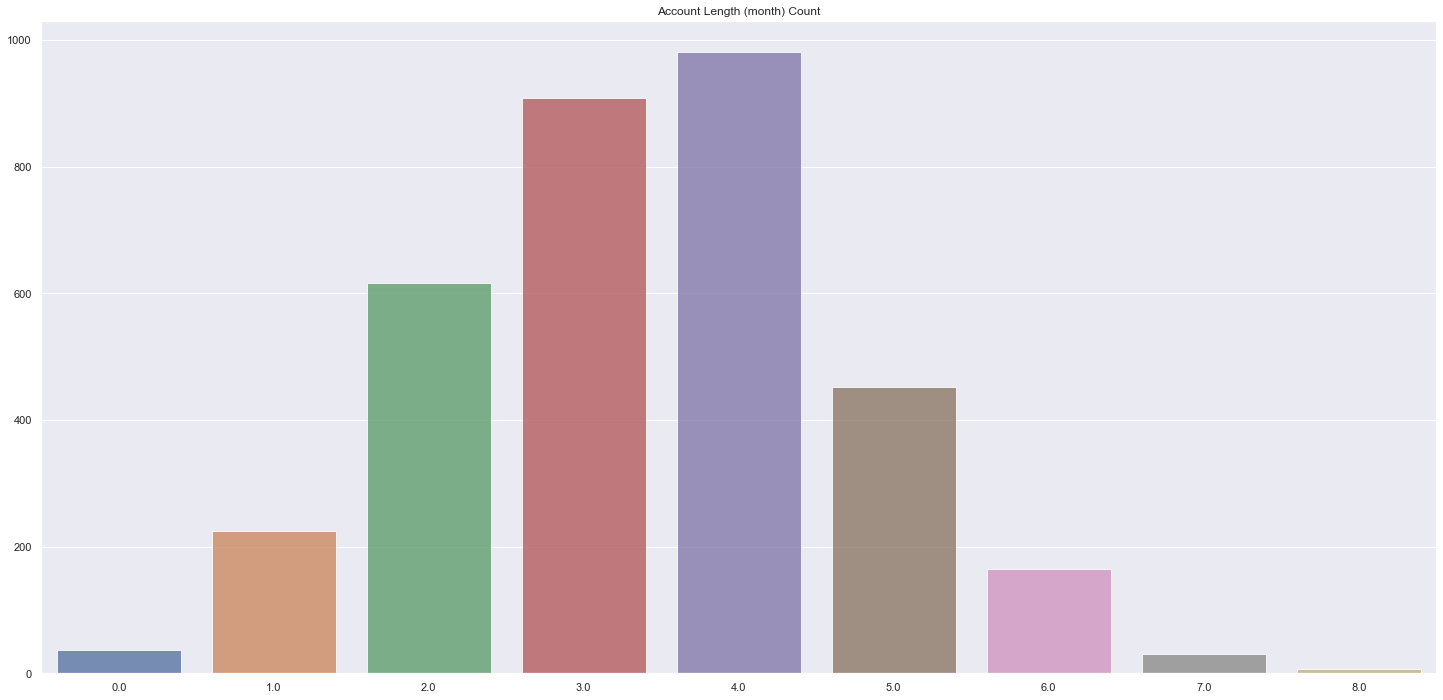

In [50]:
# By dividing account_length column by 30, we transformed unit of measurement from day to month. 
account_length_count  = round(df_sampled['account_length']/30).value_counts()
print('Account Length Mean Value:', round((df_sampled['account_length']/30).mean(),2))
print('Account Length Standard Deviation:', round((df_sampled['account_length']/30).std(),2))
plt.figure(figsize=(25,12))
sns.barplot(account_length_count.index, account_length_count.values, alpha=0.8)
plt.title('Account Length (month) Count')
plt.show();

As we can see from the graphic above, majority of the customers are clustered around the mean value. Let's see if churned and nonchurn datasets follow similar distribution.

Not Churn Account Length Mean Value         : 3.37
Not Churn Account Length Standard Deviation : 1.32
Churn Account Length Mean Value             : 3.43
Churn Account Length Standard Deviation     : 1.32


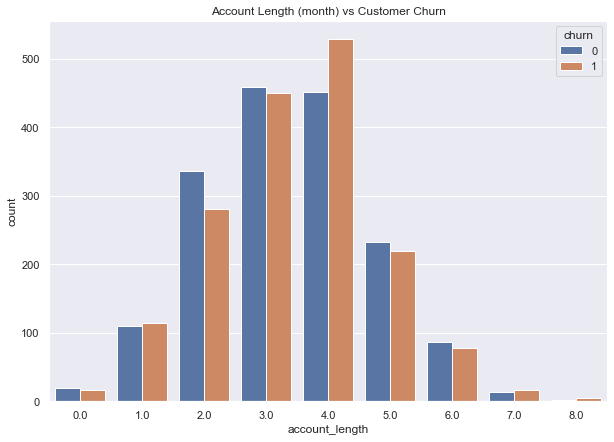

In [51]:
print('Not Churn Account Length Mean Value         :', round((df_sampled[df_sampled['churn']==0]['account_length']/30).mean(),2))
print('Not Churn Account Length Standard Deviation :', round((df_sampled[df_sampled['churn']==0]['account_length']/30).std(),2))
print('Churn Account Length Mean Value             :', round((df_sampled[df_sampled['churn']==1]['account_length']/30).mean(),2))
print('Churn Account Length Standard Deviation     :', round((df_sampled[df_sampled['churn']==1]['account_length']/30).std(),2))

sns.countplot(x=round(df_sampled['account_length']/30), hue='churn', data=df_sampled);
plt.title('Account Length (month) vs Customer Churn')
plt.show();

### *CONCLUSION:*

For customers who churn(mu=3.42, sigma=1.32) and not churn (mu=3.36, sigma=1.33), we have similar mean values and standard deviations for account lenght data. As we can observe from the graphics above, they have similar distributions. We can conclude that __account_length__ doesn't seem to have a significant effect whether a customer leaves the company or not. 

--------------------------------------------------------------------------------------------------------------------

### area_code

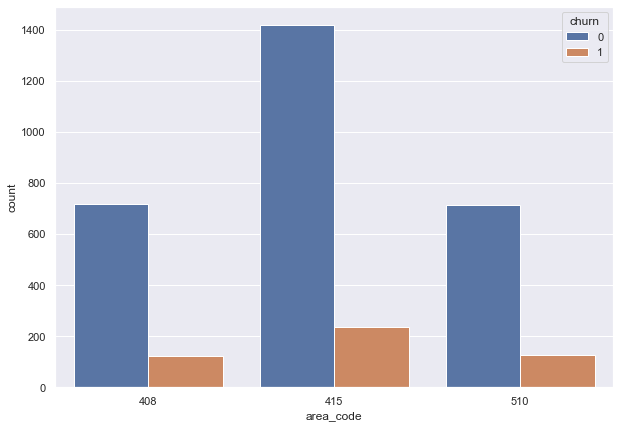

In [13]:
sns.countplot(x='area_code', hue='churn', data=df);

Because our original dataset have imbalanced class sizes, it may be hard to interpret the graph above. Let's check *__area_code__* column for sampled dataset to see if it has any effect on whether a customer leaves the company or continue their contract.

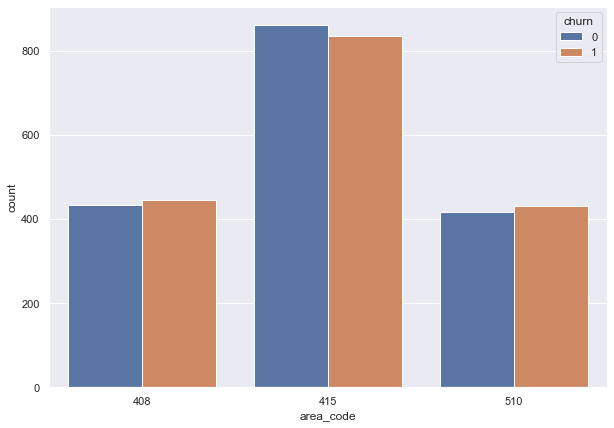

In [14]:
# df_sampled = pd.concat([df_churn, df_not_churn])
sns.countplot(x='area_code', hue='churn', data=df_sampled);

As we can see, there is no significant difference between two classes for each area code. We can assume that *__area_code__* column does not provide valuable information. We can drop this column.

In [15]:
df.drop('area_code', axis=1, inplace=True)

--------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------

## Determine the relationship between customer churn behavior and international plan.

international_plan  churn
0                   0        0.89
                    1        0.11
1                   0        0.58
                    1        0.42
Name: churn, dtype: float64


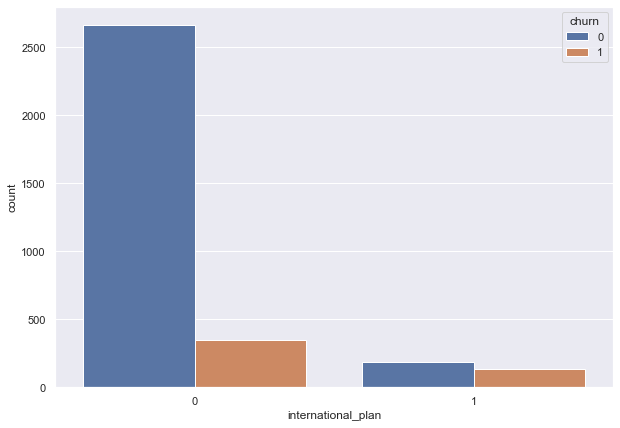

In [65]:
sns.countplot(x='international_plan', hue='churn', data=df);
print(round(df.groupby('international_plan')['churn'].value_counts(normalize=True),2))

We will use the *df_sampled* dataset to visualize to see if there is a visual difference between two classes.

international_plan  churn
0                   0        0.56
                    1        0.44
1                   1        0.80
                    0        0.20
Name: churn, dtype: float64


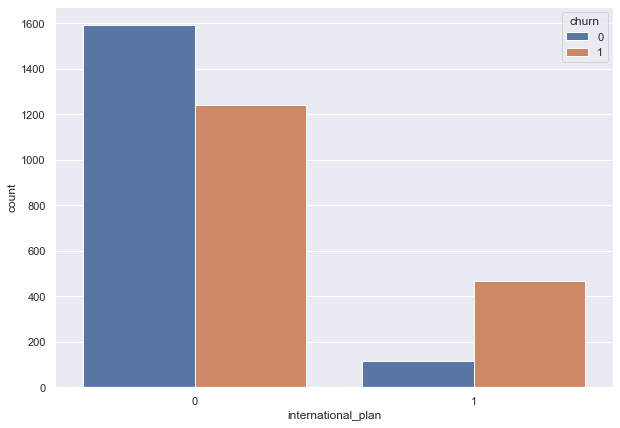

In [66]:
sns.countplot(x='international_plan', hue='churn', data=df_sampled);
print(round(df_sampled.groupby('international_plan')['churn'].value_counts(normalize=True),2))

In [67]:
df_intl_plan = df_sampled[df_sampled['international_plan'] == 1]
print('The number of customers with international plan:', len(df_intl_plan))
print(round(df_intl_plan['churn'].value_counts(normalize=True),2))
print('--------------------------------------------------')
df_intl_no_plan = df_sampled[df_sampled['international_plan'] == 0]
print('The number of customers with no international plan:', len(df_intl_no_plan))
print(round(df_intl_no_plan['churn'].value_counts(normalize=True),2))

The number of customers with international plan: 583
1    0.8
0    0.2
Name: churn, dtype: float64
--------------------------------------------------
The number of customers with no international plan: 2837
0    0.56
1    0.44
Name: churn, dtype: float64


We can conclude that, when we evaluate balanced sample spaces regarding to churn/not churn classes:
* 80% of the customers with international plan tend to leave the company. 
* Only 20% of the customers with international plan keep their contract. 
* 56% of the customers with no international plan do not churn.
* 44% of the customers with no international plan churn.


Let's dig deeper about international plan and other columns that involves international call informations. First, we will create a data frame with *__international_plan__*, *__total_intl_minutes__*, *__total_intl_calls__*, *__total_intl_charge__*, *__intl_charge_per_call__*, *__ave_intl_call_length_per_call__*, *__intl_charge_per_min__*,  *__churn__* columns from sampled space.

In [68]:
df.groupby('churn')['international_plan'].value_counts()

churn  international_plan
0      0                     2664
       1                      186
1      0                      346
       1                      137
Name: international_plan, dtype: int64

In [69]:
# Creating a subset with all the international information columns.
df_intl = df_sampled[['international_plan', 'total_intl_minutes', 'total_intl_calls', 
                      'total_intl_charge', 'intl_charge_per_call', 'intl_call_length_per_call', 
                      'intl_charge_per_min', 'intl_charge_percentage', 'total_charge', 'churn']]
df_intl.describe().T

,count,mean,std,min,25%,50%,75%,max
international_plan,3420.0,0.170468,0.376098,0.0,0.00000,0.000,0.000,1.000
total_intl_minutes,3420.0,10.448129,2.790698,0.0,8.70000,10.400,12.300,20.000
total_intl_calls,3420.0,4.366082,2.534562,0.0,3.00000,4.000,6.000,20.000
total_intl_charge,3420.0,2.821550,0.753479,0.0,2.35000,2.810,3.320,5.400
intl_charge_per_call,3420.0,0.888833,0.624191,0.0,0.46950,0.711,1.127,4.590
intl_call_length_per_call,3420.0,3.291566,2.311703,0.0,1.73825,2.633,4.167,17.000
intl_charge_per_min,3420.0,0.269264,0.014587,0.0,0.27000,0.270,0.270,0.273
intl_charge_percentage,3420.0,0.047472,0.016207,0.0,0.03600,0.046,0.057,0.124
total_charge,3420.0,61.880702,12.357279,23.0,53.00000,61.000,72.000,96.000
churn,3420.0,0.500000,0.500073,0.0,0.00000,0.500,1.000,1.000


We will create a subsample space where the number of international plan class-ratio is 50% for each class. 

In [70]:
df_intl_plan = df_intl[df_intl['international_plan'] == 1]
print(len(df_intl_plan))
df_intl_no_plan = df_intl[df_intl['international_plan'] == 0]
# df_intl_no_plan = df_intl_no_plan.sample(n=959, replace=False, random_state=123)
print(len(df_intl_no_plan))

# df_intl_sampled = pd.concat([df_intl_plan, df_intl_no_plan])
# df_intl_sampled.shape

583
2837


In [71]:
df_intl['international_plan'].value_counts()

0    2837
1     583
Name: international_plan, dtype: int64

In [72]:
round(df_intl.drop('total_charge', axis=1).groupby(['international_plan', 'churn']).describe().T, 3)

international_plan                      0                  1         
churn                                   0         1        0        1
total_intl_minutes        count  1594.000  1243.000  116.000  467.000
                          mean     10.227    10.277    9.834   11.811
                          std       2.813     2.628    2.150    2.889
                          min       0.000     2.000    1.300    4.100
                          25%       8.400     8.700    8.700    9.850
                          50%      10.300    10.200   10.050   11.700
                          75%      12.100    12.000   11.325   13.900
                          max      18.400    18.300   13.000   20.000
total_intl_calls          count  1594.000  1243.000  116.000  467.000
                          mean      4.444     4.350    5.190    3.940
                          std       2.414     2.506    2.299    2.964
                          min       0.000     1.000    3.000    1.000
                          25%       3.000     3.000    4.000    2.000
                          50%       4.000     4.000    4.000    3.000
                          75%       6.000     5.500    6.000    5.500
                          max      18.000    15.000   15.000   20.000
total_intl_charge         count  1594.000  1243.000  116.000  467.000
                          mean      2.762     2.776    2.656    3.189
                          std       0.759     0.710    0.580    0.780
                          min       0.000     0.540    0.350    1.110
                          25%       2.270     2.350    2.350    2.660
                          50%       2.780     2.750    2.715    3.160
                          75%       3.270     3.240    3.057    3.750
                          max       4.970     4.940    3.510    5.400
intl_charge_per_call      count  1594.000  1243.000  116.000  467.000
                          mean      0.837     0.873    0.600    1.179
                          std       0.607     0.594    0.260    0.726
                          min       0.000     0.081    0.058    0.187
                          25%       0.452     0.463    0.392    0.647
                          50%       0.661     0.737    0.594    1.120
                          75%       1.037     1.065    0.775    1.493
                          max       4.590     4.000    1.170    4.100
intl_call_length_per_call count  1594.000  1243.000  116.000  467.000
                          mean      3.101     3.231    2.222    4.368
                          std       2.247     2.201    0.964    2.689
                          min       0.000     0.300    0.217    0.695
                          25%       1.676     1.717    1.450    2.400
                          50%       2.450     2.733    2.200    4.150
                          75%       3.833     3.950    2.875    5.525
                          max      17.000    14.800    4.333   15.200
intl_charge_per_min       count  1594.000  1243.000  116.000  467.000
                          mean      0.268     0.270    0.270    0.270
                          std       0.021     0.000    0.000    0.000
                          min       0.000     0.269    0.269    0.269
                          25%       0.270     0.270    0.270    0.270
                          50%       0.270     0.270    0.270    0.270
                          75%       0.270     0.270    0.270    0.270
                          max       0.273     0.271    0.271    0.271
intl_charge_percentage    count  1594.000  1243.000  116.000  467.000
                          mean      0.049     0.044    0.046    0.053
                          std       0.016     0.016    0.013    0.016
                          min       0.000     0.007    0.005    0.017
                          25%       0.038     0.032    0.039    0.040
                          50%       0.047     0.042    0.046    0.052
                          75%       0.058     0.053    0.052    0.064
          

*__Observations:__*

*Customers without international plan:*
    
* Out of 2837 customers with no international plan, 1243 of them ended their contract while 1584 stayed.
* Customers pay the same amount of international charge per minute. (Both churn and not churn)
* Customers in both classes have similar total international minutes on their accounts.
* Average international call lenght per call is higher for customers who left.
* Customers who made 0 international calls did not churn.
* The percentage of the international charge in total charge seems similar for customers with and without international plans in both churn classes.

*Customers with international plan:*

* Out of 583 customers with international plan, 467 of them ended their contract while 116 stayed.
* Customers pay the same amount of international charge per minute. (Both churn and not churn)
* People who churn talk more on the phone(in minutes) even though they make less calls in average.
* Because they spend more time on the phone, they pay more international charge. (not churn - \\$2.656, churn - \\$3.189)
* People who churn pay and average of \\$1.179 per international call while, customers who did not churn pay \\$0.600 per call.
* Customers who did not churn talk average 2.222 minutes per international call, while churned customers talk twice as long(4.368 minutes).
* Customers who made 1 or 2 international phone calls churn.




*__Visualizing churn vs total international minutes regarding customers with international plan and no international plan:__*


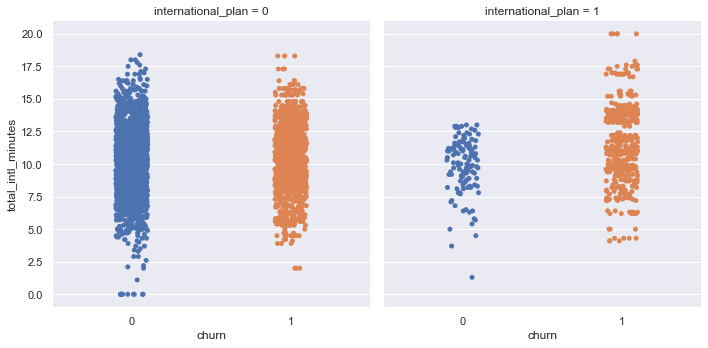

In [73]:
sns.catplot(x='churn', y='total_intl_minutes', col='international_plan', data=df_intl);

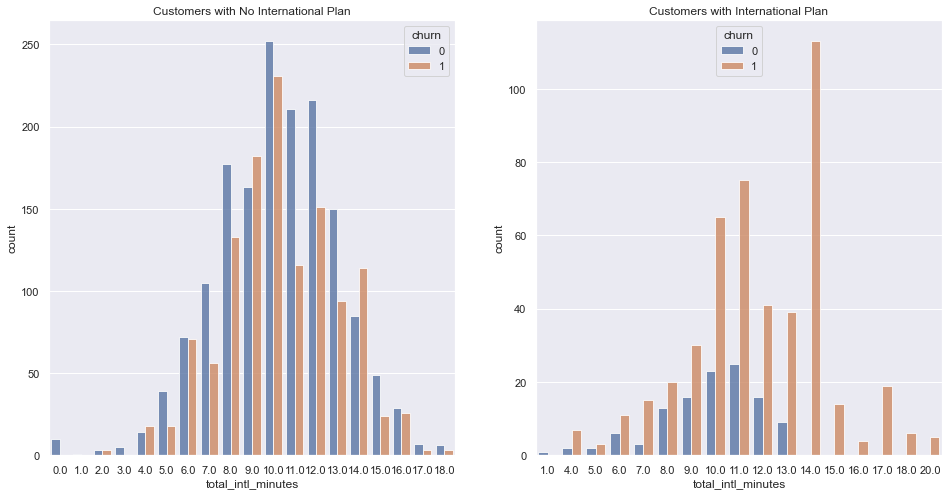

In [74]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(16,8)
sns.countplot(x=round(df_intl_no_plan['total_intl_minutes']), 
              hue='churn', 
              data=df_intl_no_plan, 
#               dodge=False, 
              alpha=0.8, 
              ax=ax[0]).set_title('Customers with No International Plan')
sns.countplot(x=round(df_intl_plan['total_intl_minutes']), 
              hue='churn', 
              data=df_intl_plan, 
#               dodge=False, 
              alpha=0.8, 
              ax=ax[1]).set_title('Customers with International Plan')
fig.show();

In [26]:
df_intl[df_intl['total_intl_minutes'] > 13].groupby('international_plan')['churn'].value_counts()

international_plan  churn
0                   0        247
                    1        209
1                   1        198
Name: churn, dtype: int64

In [27]:
print('Average International Minutes with No International Plan:', round(df_intl_no_plan['total_intl_minutes'].mean(),2))
print('Average International Minutes with International Plan:', round(df_intl_plan['total_intl_minutes'].mean(),2))

Average International Minutes with No International Plan: 10.25
Average International Minutes with International Plan: 11.42


*__Observations:__*

* Churn data for customers with no international plan almost follows a normal distribution with majority of class 0 for total international minutes.
* Customers with international plan talk longer on the phone.
* Customers with international plan more likely to churn.

*__Visualizing churn vs total international calls regarding customers with international plan and no international plan:__*

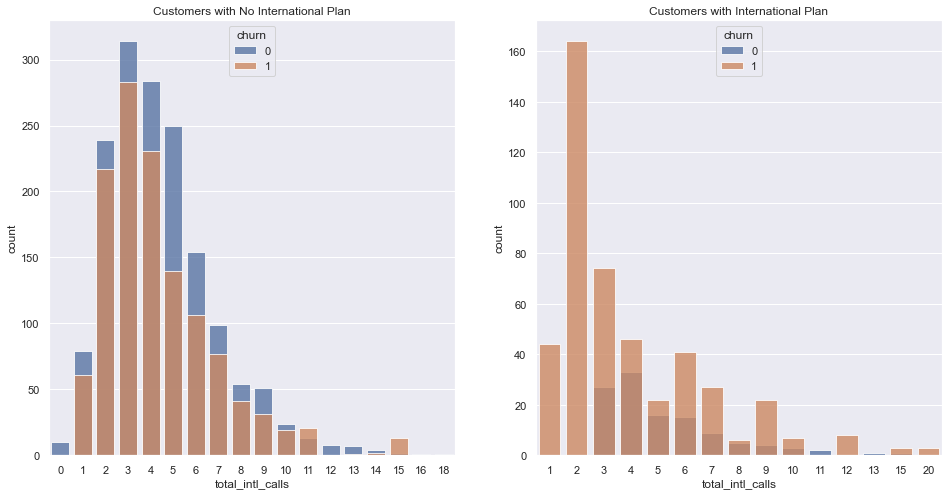

In [28]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(16,8)
sns.countplot(x='total_intl_calls', 
              hue='churn', 
              data=df_intl_no_plan, 
              dodge=False, 
              alpha=0.8, 
              ax=ax[0]).set_title('Customers with No International Plan')
sns.countplot(x='total_intl_calls', 
              hue='churn', 
              data=df_intl_plan, 
              dodge=False, 
              alpha=0.8, 
              ax=ax[1]).set_title('Customers with International Plan')
fig.show();

In [29]:
print('Average International Calls with No International Plan:', round(df_intl_no_plan['total_intl_calls'].mean(),2))
print('Average International Calls with International Plan:', round(df_intl_plan['total_intl_calls'].mean(),2))

Average International Calls with No International Plan: 4.4
Average International Calls with International Plan: 4.19


*__Observations:__*

* Customers with no plan who never made international calls did not churn.
* Customers with plan who made 1 or 2 international calls ended their contract.
* Customers with no international plan make more phone calls in average.
* For different number of calls, churn rate is higher for people with international plan.

*__Visualizing churn vs total international charge regarding customers with international plan and no international plan:__*

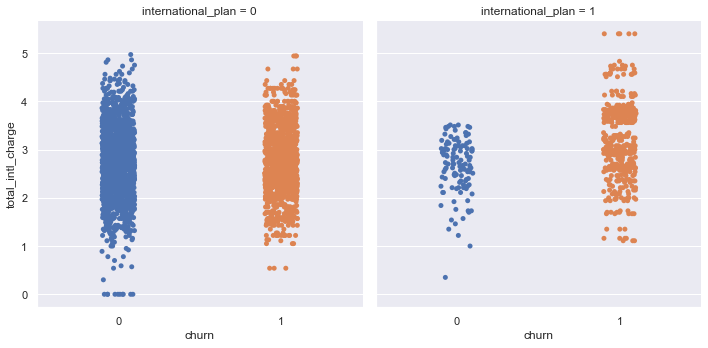

In [30]:
sns.catplot(x='churn', y='total_intl_charge', col='international_plan', data=df_intl);

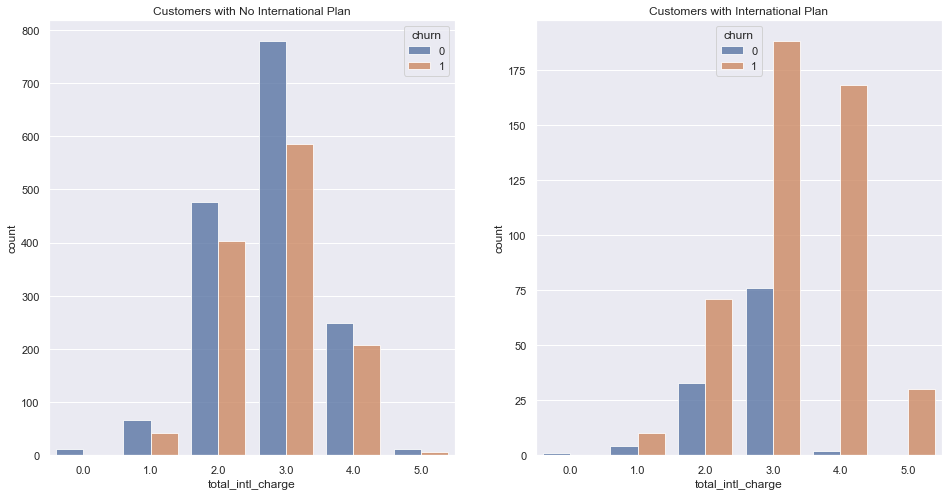

In [82]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(16,8)
sns.countplot(x=round(df_intl_no_plan['total_intl_charge']), 
              hue='churn', 
              data=df_intl_no_plan, 
#               dodge=False, 
              alpha=0.8, 
              ax=ax[0]).set_title('Customers with No International Plan')
sns.countplot(x=round(df_intl_plan['total_intl_charge']), 
              hue='churn', 
              data=df_intl_plan, 
#               dodge=False, 
              alpha=0.8, 
              ax=ax[1]).set_title('Customers with International Plan')
fig.show();

In [102]:
round(round(df_intl_no_plan['total_intl_minutes']).value_counts(normalize=True),4)

10.0    0.1703
12.0    0.1294
9.0     0.1216
11.0    0.1153
8.0     0.1093
13.0    0.0860
14.0    0.0701
7.0     0.0568
6.0     0.0504
15.0    0.0257
5.0     0.0201
16.0    0.0194
4.0     0.0113
0.0     0.0035
17.0    0.0035
18.0    0.0032
2.0     0.0021
3.0     0.0018
1.0     0.0004
Name: total_intl_minutes, dtype: float64

In [103]:
round(round(df_intl_plan['total_intl_minutes']).value_counts(normalize=True),3)

14.0    0.194
11.0    0.172
10.0    0.151
12.0    0.098
13.0    0.082
9.0     0.079
8.0     0.057
17.0    0.033
7.0     0.031
6.0     0.029
15.0    0.024
4.0     0.015
18.0    0.010
20.0    0.009
5.0     0.009
16.0    0.007
1.0     0.002
Name: total_intl_minutes, dtype: float64

In [81]:
df_sampled['international_plan'].value_counts(normalize=True)

0    0.829532
1    0.170468
Name: international_plan, dtype: float64

In [32]:
print('Average International Charge with No International Plan:', round(df_intl_no_plan['total_intl_charge'].mean(),2))
print('Average International Charge with International Plan:', round(df_intl_plan['total_intl_charge'].mean(),2))

Average International Charge with No International Plan: 2.77
Average International Charge with International Plan: 3.08


*__Observations:__*

* Customers with international plan pay more in average. 
* Customers with international plan tend to churn more often.
* The more customers with international plan pay, the churn rate is higher.
* Churn ratio is smaller for customers with no international plan.

*__Visualizing churn vs international charge per minute regarding customers with international plan and no international plan:__*

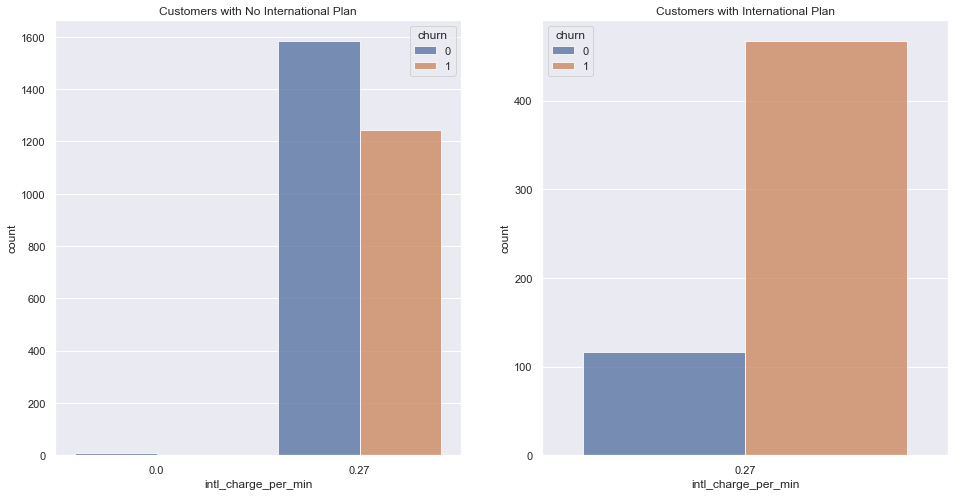

In [33]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(16,8)
sns.countplot(x=round(df_intl_no_plan['intl_charge_per_min'],2), 
              hue='churn', 
              data=df_intl_no_plan, 
#               dodge=False, 
              alpha=0.8, 
              ax=ax[0]).set_title('Customers with No International Plan')
sns.countplot(x=round(df_intl_plan['intl_charge_per_min'],2), 
              hue='churn', 
              data=df_intl_plan, 
#               dodge=False, 
              alpha=0.8, 
              ax=ax[1]).set_title('Customers with International Plan')
fig.show();

*__Observations:__*

* Customers pay \\$0.27 per minute for international calls whether they have international plan or not.
* There are a small amount of customers who never made any international calls.

*__Visualizing churn vs international call length per call regarding customers with international plan and no international plan:__*

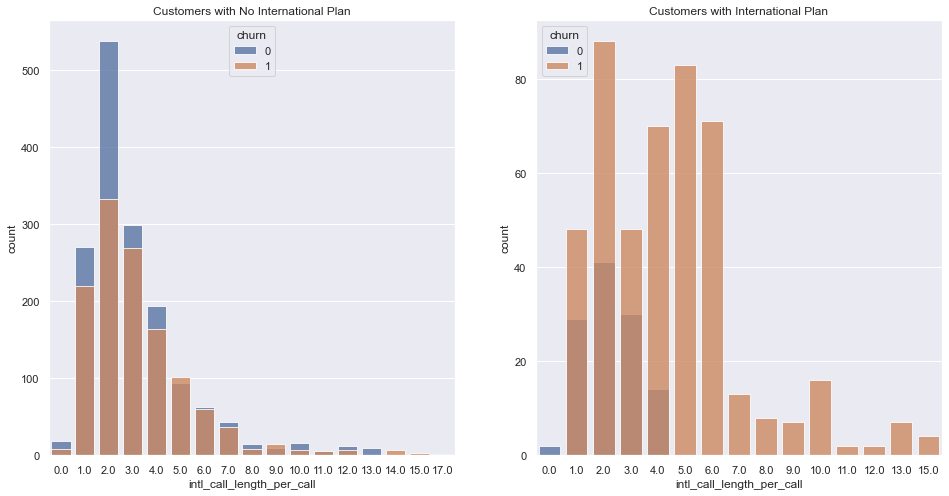

In [34]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(16,8)
sns.countplot(x=round(df_intl_no_plan['intl_call_length_per_call']), 
              hue='churn', 
              data=df_intl_no_plan, 
              dodge=False, 
              alpha=0.8, 
              ax=ax[0]).set_title('Customers with No International Plan')
sns.countplot(x=round(df_intl_plan['intl_call_length_per_call']), 
              hue='churn', 
              data=df_intl_plan, 
              dodge=False, 
              alpha=0.8, 
              ax=ax[1]).set_title('Customers with International Plan')
fig.show();

In [35]:
print('Average call lengh per call with no international plan:',round(df_intl_no_plan['intl_call_length_per_call'].mean(),3))
print('Average call lengh per call with international plan:',round(df_intl_plan['intl_call_length_per_call'].mean(),3))

Average call lengh per call with no international plan: 3.158
Average call lengh per call with international plan: 3.941


*__Observations:__*

* Customers with international plan have longer phone calls in average.
* Customers with international plan who make phone calls longer than 4 minutes in average more likely to churn.

*__Visualizing churn vs international charge per call regarding customers with international plan and no international plan:__*

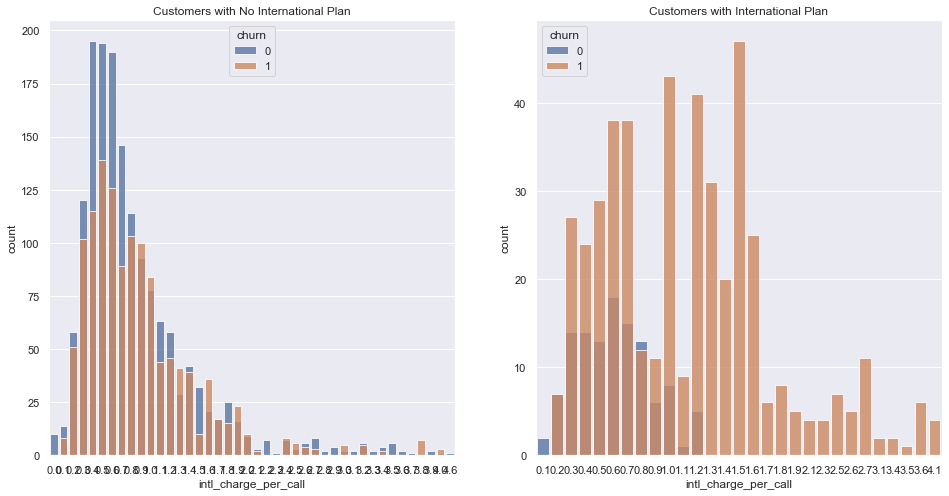

In [36]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(16,8)
sns.countplot(x=round(df_intl_no_plan['intl_charge_per_call'],1), 
              hue='churn', 
              data=df_intl_no_plan, 
              dodge=False, 
              alpha=0.8, 
              ax=ax[0]).set_title('Customers with No International Plan')
sns.countplot(x=round(df_intl_plan['intl_charge_per_call'],1), 
              hue='churn', 
              data=df_intl_plan, 
              dodge=False, 
              alpha=0.8, 
              ax=ax[1]).set_title('Customers with International Plan')
fig.show();

In [37]:
print('Average international charge per call without international plan',round(df_intl_no_plan['intl_charge_per_call'].mean(),2))
print('Average international charge per call with international plan', round(df_intl_plan['intl_charge_per_call'].mean(),2))

Average international charge per call without international plan 0.85
Average international charge per call with international plan 1.06


*__Observations:__*

* Customers with international plan pay an average of \\$1.06 per call while customers with no plan pay \\$.85.
* Customers with international plan churn more often when international charge per call increases.

*__Visualizing total international charge vs international charge percentage on churn class, regarding customers with international plan and no international plan:__*

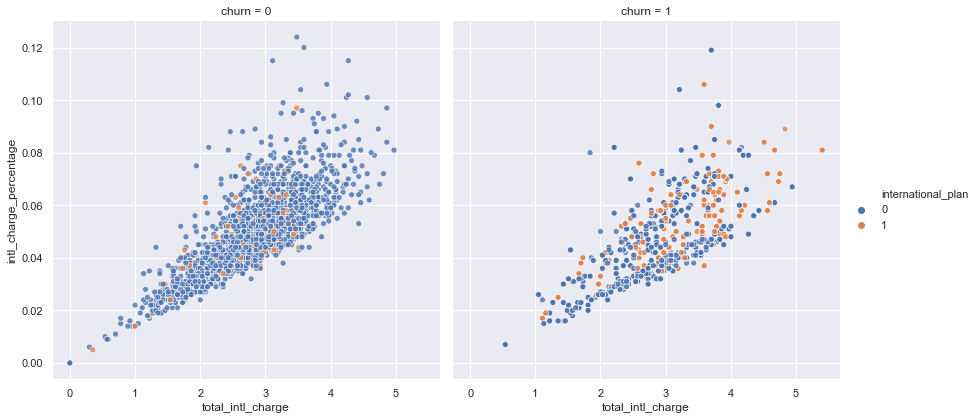

In [38]:
sns.relplot(x='total_intl_charge',
            y='intl_charge_percentage', 
            hue='international_plan', 
            col='churn', 
            data=df_intl, 
            alpha=0.8,
            height=6);

In [39]:
# Checking if there is a hidden fee for customers with international plan.
df_intl[(df_intl['total_intl_minutes'] == 13)  & (df_intl['total_intl_calls'] == 3)].head()

,international_plan,total_intl_minutes,total_intl_calls,total_intl_charge,intl_charge_per_call,intl_call_length_per_call,intl_charge_per_min,intl_charge_percentage,total_charge,churn
434,1,13.0,3,3.51,1.17,4.333,0.27,0.048,73.0,0
569,0,13.0,3,3.51,1.17,4.333,0.27,0.054,65.0,0
1144,0,13.0,3,3.51,1.17,4.333,0.27,0.062,57.0,0
1165,0,13.0,3,3.51,1.17,4.333,0.27,0.058,61.0,0
1313,0,13.0,3,3.51,1.17,4.333,0.27,0.058,60.0,0


### *CONCLUSION:*

* There is no (hidden) fee for international plan.
* People with international plan and without international plan pay the same amount per minute.
* This indicates there is no advantage of having international plan.
* However, customers with international plan use more international minutes resulting paying more international charge.
* Customers with international plan made at least 1 international call before they ended their contract.

--------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------

## What is the relationship between the number of voicemail messages and customer churn? What is the role of voicemail plan in this relationship?


Let's start analyzing the customers with/out voice mail plan.

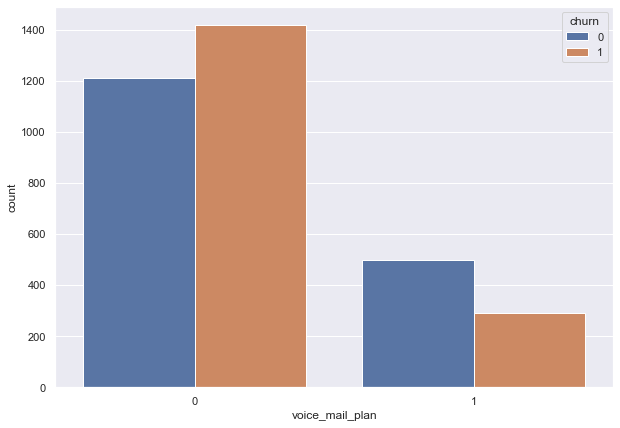

In [40]:
sns.countplot(x='voice_mail_plan', hue='churn', data=df_sampled);


In [41]:
print(df_sampled['voice_mail_plan'].value_counts())
round(df_sampled['voice_mail_plan'].value_counts(normalize=True),2)

0    2630
1     790
Name: voice_mail_plan, dtype: int64


0    0.77
1    0.23
Name: voice_mail_plan, dtype: float64

In [42]:
print(df_sampled.groupby('voice_mail_plan')['churn'].value_counts())
round(df_sampled.groupby('voice_mail_plan')['churn'].value_counts(normalize=True),2)

voice_mail_plan  churn
0                1        1418
                 0        1212
1                0         498
                 1         292
Name: churn, dtype: int64


voice_mail_plan  churn
0                1        0.54
                 0        0.46
1                0        0.63
                 1        0.37
Name: churn, dtype: float64

In [43]:
print(df_sampled.groupby('churn')['voice_mail_plan'].value_counts())
round(df_sampled.groupby('churn')['voice_mail_plan'].value_counts(normalize=True),2)

churn  voice_mail_plan
0      0                  1212
       1                   498
1      0                  1418
       1                   292
Name: voice_mail_plan, dtype: int64


churn  voice_mail_plan
0      0                  0.71
       1                  0.29
1      0                  0.83
       1                  0.17
Name: voice_mail_plan, dtype: float64

*__Observations:__*

* Given the equal class sizes on out target variable 'churn', 23% of the customers have voice mail plan.
* Out of 3420 of customers, 790 of them have voicemail plan.
* From the customers with voice mail plan, 37% of them(292) churn and 63%(498) do not churn. 

* 77% of customers don't have voice mail plan. (2630 accounts)
* From the customers with no voice mail plan(2630),  54% of them churn(1418).
* 83% of the customers who churn, don't have voice mail plan.


*__Let's check the relationship between the voicemail plan and the number of voicemail messages received.__*

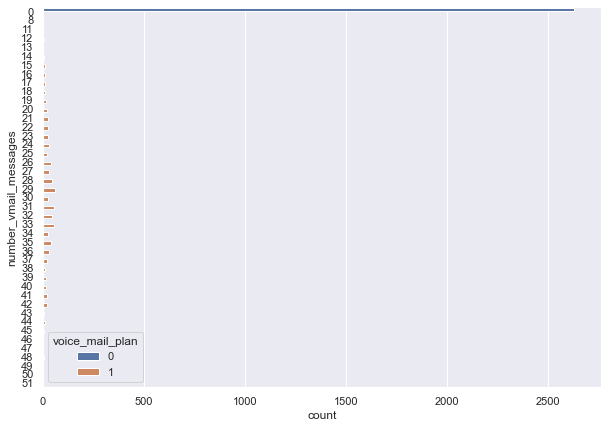

In [44]:
sns.countplot(y='number_vmail_messages', hue='voice_mail_plan', data=df_sampled);

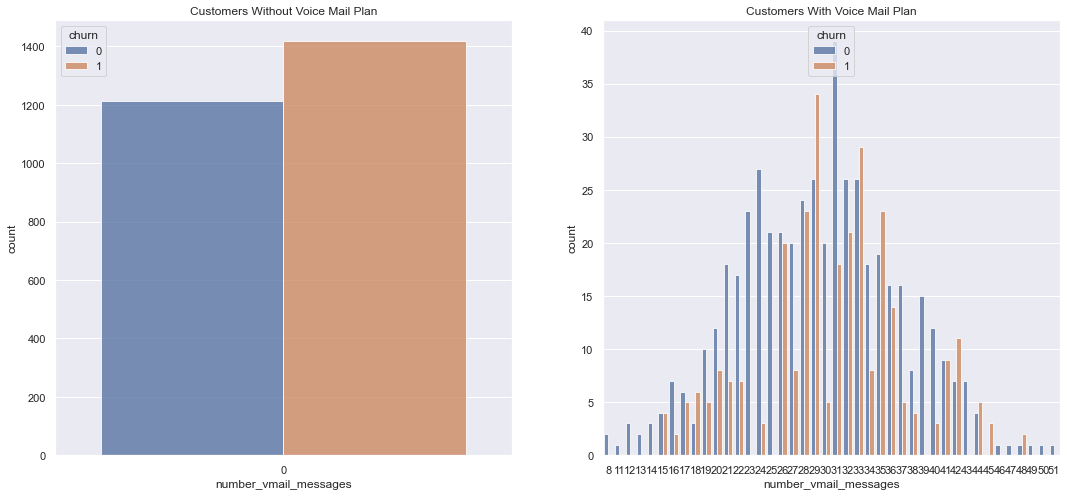

In [45]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(18,8)
sns.countplot(x='number_vmail_messages', 
              hue='churn', 
              data=df_sampled[df_sampled['voice_mail_plan'] == 0], 
              alpha=0.8, 
#               dodge=False, 
              ax=ax[0]).set_title('Customers Without Voice Mail Plan')
sns.countplot(x='number_vmail_messages', 
              hue='churn', 
              data=df_sampled[df_sampled['voice_mail_plan'] == 1], 
              alpha=0.8, 
#               dodge=False, 
              ax=ax[1]).set_title('Customers With Voice Mail Plan')
fig.show();

In [46]:
print('Average Voicemail Messages for Customers With Voicemail Plan:', 
      round(df_sampled[df_sampled['voice_mail_plan'] == 1]['number_vmail_messages'].mean(),2))
print('Average Voicemail Messages for Customers With Voicemail Plan Who Churn:', 
      round(df_sampled[(df_sampled['voice_mail_plan'] == 1) & (df_sampled['churn'] == 1)]['number_vmail_messages'].mean(),2))
print('Average Voicemail Messages for Customers With Voicemail Plan Who Not Churn:', 
      round(df_sampled[(df_sampled['voice_mail_plan'] == 1) & (df_sampled['churn'] == 0)]['number_vmail_messages'].mean(),2))

Average Voicemail Messages for Customers With Voicemail Plan: 29.79
Average Voicemail Messages for Customers With Voicemail Plan Who Churn: 30.6
Average Voicemail Messages for Customers With Voicemail Plan Who Not Churn: 29.32


*__Observations:__*

* Customers with no voicemail plan don't receive any voicemail. From the customers with no voicemail plan, majority of them churn(1416 customers) and 1212 of them keep their contract.
* Customers with voicemail plan who stay with the company receives an average of 29.32 messages.
* Customers with voicemail plan who leave with the company receives an average of 30.6 messages.


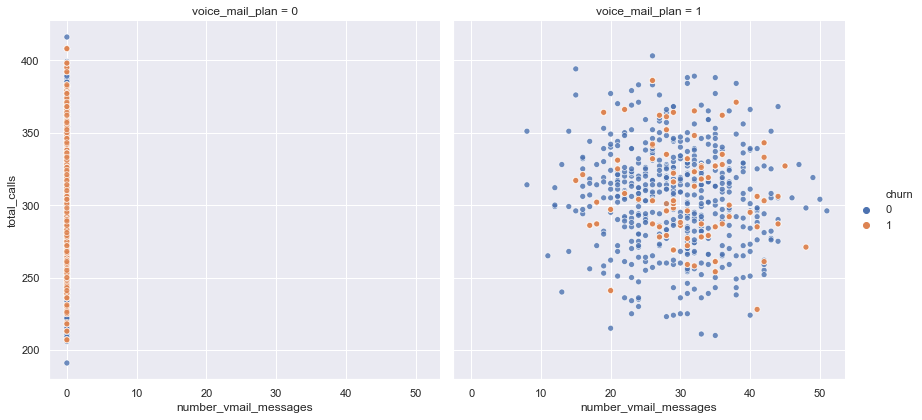

In [47]:
sns.relplot(x='number_vmail_messages',
            y='total_calls', 
            hue='churn', 
            col='voice_mail_plan', 
            data=df_sampled, 
            alpha=0.8,
            height=6);

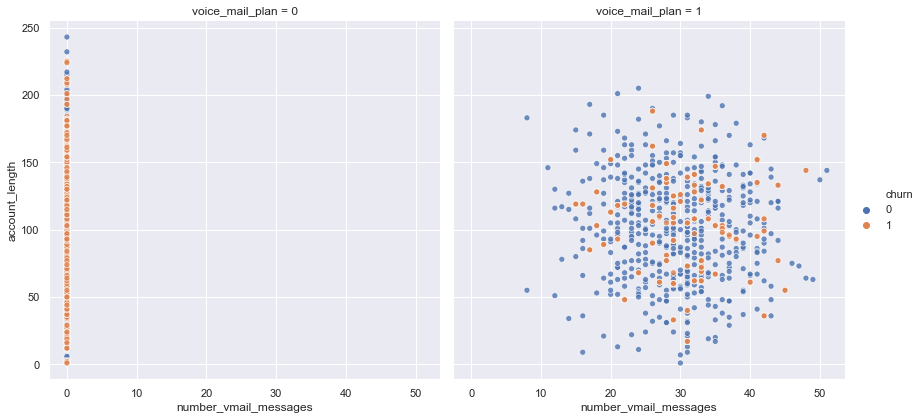

In [48]:
sns.relplot(x='number_vmail_messages',
            y='account_length', 
            hue='churn', 
            col='voice_mail_plan', 
            data=df_sampled, 
            alpha=0.8,
            height=6);

Both account length and number of total calls don't have a linear relation with the number of voicemail messages a customer receives.

********************

In [49]:
df_vm = df[df['voice_mail_plan']==1]
print(df_vm.shape)
df_vm['churn'].value_counts()

(922, 39)


0    842
1     80
Name: churn, dtype: int64

In [50]:
# Creating a subset of customers with voicemail plan where we over and under sample to meet at a mid point 
# for equal sizes of churn 0 and churn 1 classes.
df_vm0 = df_vm[df_vm['churn']==0]
df_vm0 = df_vm0.sample(n=400, replace=False, random_state=123)
df_vm1 = df_vm[df_vm['churn']==1]
df_vm1 = df_vm1.sample(n=400, replace=True, random_state=123)
df_vm = pd.concat([df_vm0, df_vm1])
print(df_vm.shape)
df_vm['churn'].value_counts()

(800, 39)


1    400
0    400
Name: churn, dtype: int64

*__Let's visualize churn behavior when churn class has equal sample space for customers with voicemail plan.__*

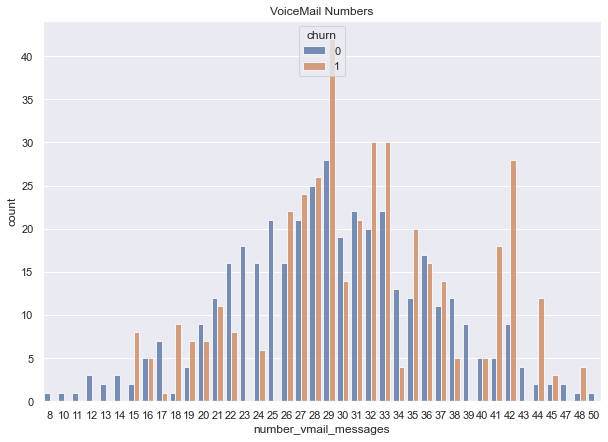

In [51]:
sns.countplot(x='number_vmail_messages', 
              hue='churn', 
              data=df_vm,
#               dodge=False,
              alpha=0.8).set_title('VoiceMail Numbers');

In [52]:
df_sampled[df_sampled['number_vmail_messages'] == 0].groupby('churn')['number_vmail_messages'].value_counts()

churn  number_vmail_messages
0      0                        1212
1      0                        1418
Name: number_vmail_messages, dtype: int64

In [53]:
df_vm.groupby('churn')['number_vmail_messages'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,400.0,29.2225,7.201225,8.0,24.0,29.0,34.0,50.0
1,400.0,31.1975,7.279145,15.0,27.0,31.0,36.0,48.0


*__Observations:__* 

* Customers with voicemail plan received at least 8 voicemail messages.
* Customers with voicemail plan received at least 15 voicemail messages before they start to churn.
* Customers who churn have a higher average number of voicemail messages.

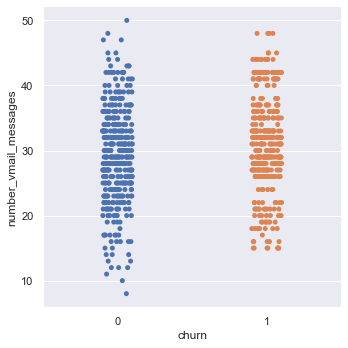

In [54]:
sns.catplot(x='churn', y='number_vmail_messages', data=df_vm);

In [55]:
# Checking churn behavior after the mean value of number of voicemail messages.
df_vm[df_vm['number_vmail_messages'] > 29].groupby('number_vmail_messages')['churn'].value_counts()

number_vmail_messages  churn
30                     0        19
                       1        14
31                     0        22
                       1        21
32                     1        30
                       0        20
33                     1        30
                       0        22
34                     0        13
                       1         4
35                     1        20
                       0        12
36                     0        17
                       1        16
37                     1        14
                       0        11
38                     0        12
                       1         5
39                     0         9
40                     0         5
                       1         5
41                     1        18
                       0         5
42                     1        28
                       0         9
43                     0         4
44                     1        12
                       0  

In [56]:
df_sampled[df_sampled['voice_mail_plan']==0].groupby('churn')['number_vmail_messages'].value_counts()

churn  number_vmail_messages
0      0                        1212
1      0                        1418
Name: number_vmail_messages, dtype: int64

### *CONCLUSION:*

* 77% of the customers do not have voicemail plan(out of 3420). Out of this 77%(2630) with no voicemail mail, 54%(1418) of them churn. 
* From the customers with voice mail plan(790), 37% of them(292) churn.
* Customers with voicemail plan who churn have a slightly higher mean value for the number of voicemails they receive.(NonChurn mu = 29.2, Churn mu = 31.2)
* The number of the voicemail messages received almost follows a normal distribution with skews for both classes.
* People who receive more voicemail messages in average tend to churn more often.




--------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------

## Compare the effects of different kind of charges on customer churn.

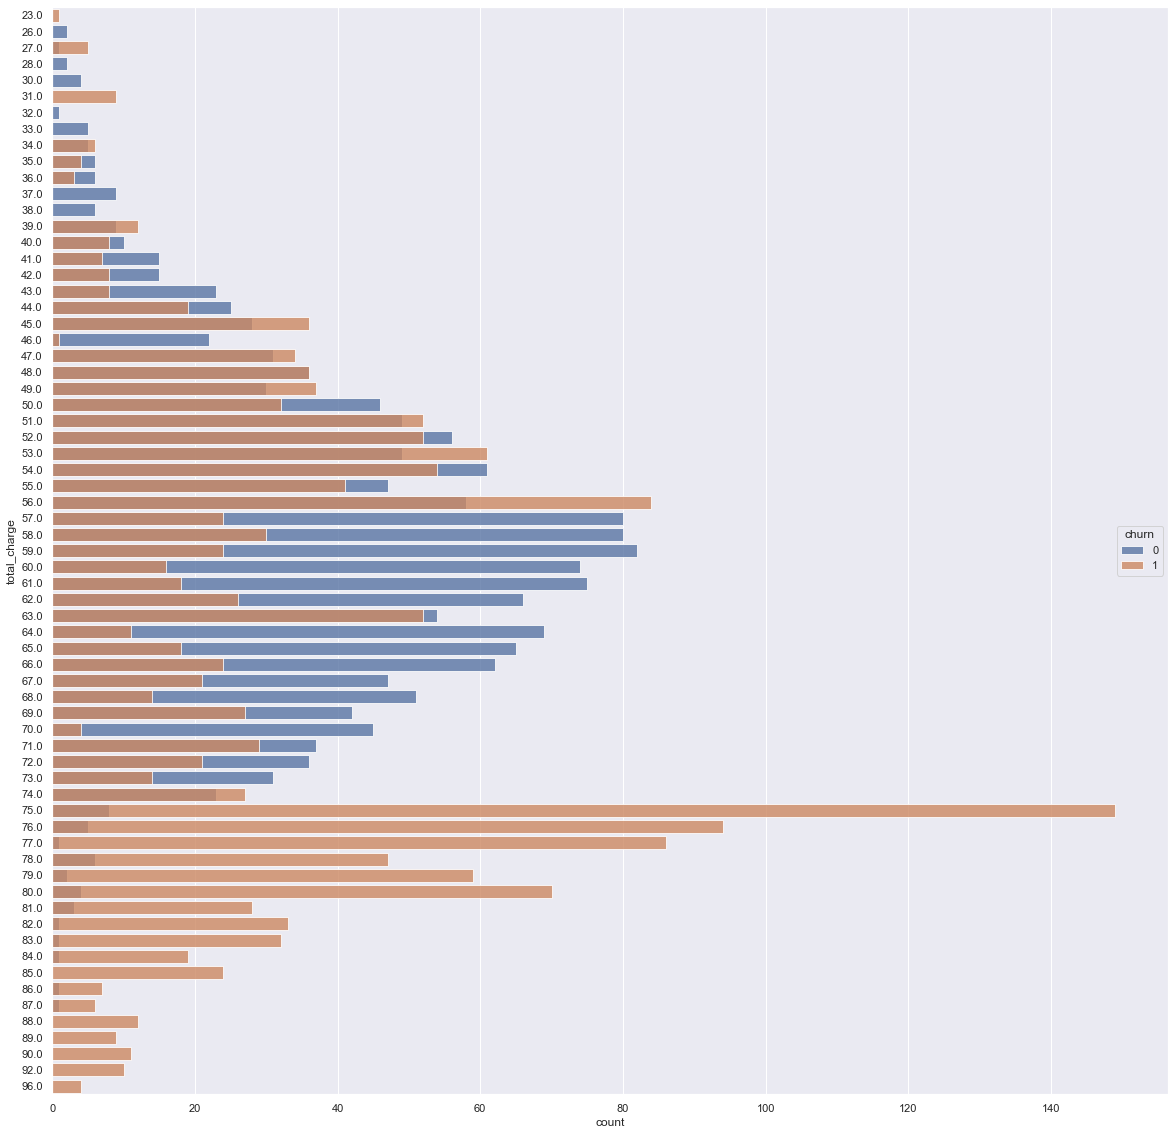

In [57]:
plt.figure(figsize=(20,20))
sns.countplot(y='total_charge', 
              hue='churn', 
              data=df_sampled, 
              dodge=False, 
              alpha=0.8)
plt.show();

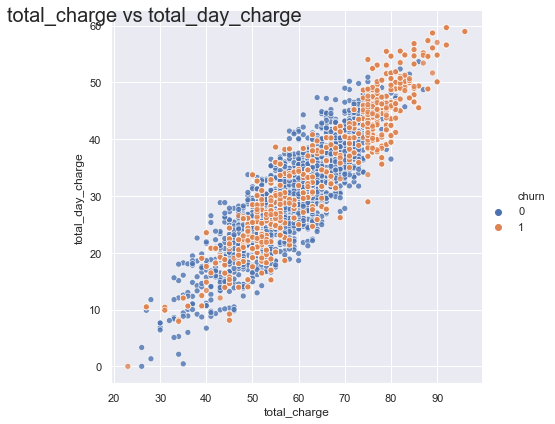

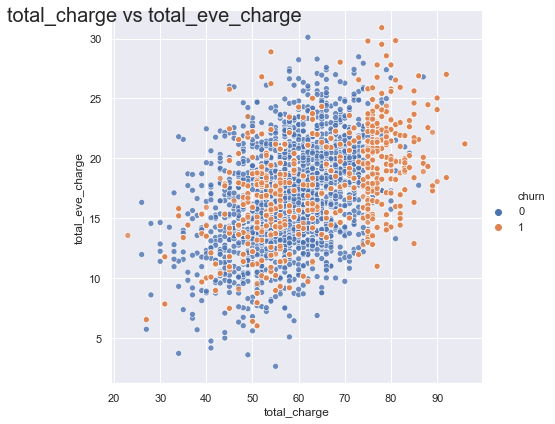

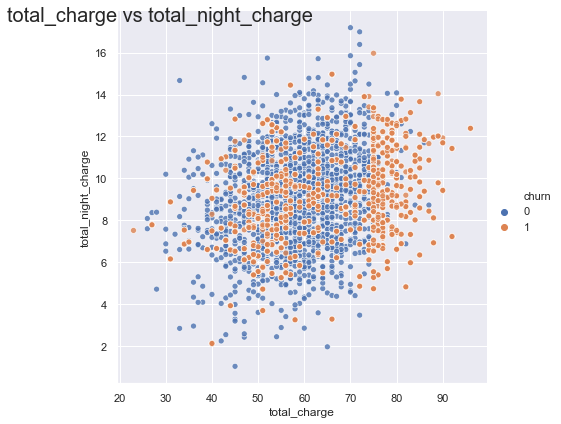

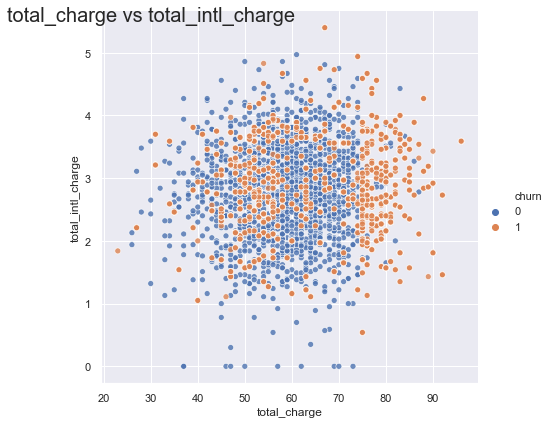

In [58]:
cols = ['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge' ]

for col in cols:
    g = sns.relplot(x='total_charge',
                    y=col, 
                    hue='churn',  
                    data=df_sampled, 
                    alpha=0.8,
                    height=6)                   
    g.fig.suptitle('total_charge vs {}'.format(col), x=0.2, y=0.98, fontsize=20)

In [59]:
round(df_sampled.groupby('churn')['total_charge', 'total_day_charge', 'total_eve_charge', 
                            'total_night_charge', 'total_intl_charge'].describe().T,2)

churn                           0        1
total_charge       count  1710.00  1710.00
                   mean     58.39    65.37
                   std       9.49    13.82
                   min      26.00    23.00
                   25%      52.00    53.00
                   50%      59.00    67.00
                   75%      65.00    77.00
                   max      87.00    96.00
total_day_charge   count  1710.00  1710.00
                   mean     29.71    35.30
                   std       8.44    11.71
                   min       0.00     0.00
                   25%      24.34    25.84
                   50%      30.12    36.92
                   75%      35.50    45.37
                   max      53.65    59.64
total_eve_charge   count  1710.00  1710.00
                   mean     16.90    18.03
                   std       4.26     4.45
                   min       2.65     6.03
                   25%      13.87    15.01
                   50%      17.05    17.94
                   75%      19.86    21.21
                   max      30.11    30.91
total_night_charge count  1710.00  1710.00
                   mean      9.03     9.16
                   std       2.30     2.15
                   min       1.04     2.13
                   25%       7.45     7.63
                   50%       9.00     9.20
                   75%      10.59    10.74
                   max      17.19    15.97
total_intl_charge  count  1710.00  1710.00
                   mean      2.75     2.89
                   std       0.75     0.75
                   min       0.00     0.54
                   25%       2.27     2.38
                   50%       2.78     2.84
                   75%       3.26     3.48
                   max       4.97     5.40

### *CONCLUSION:*

* Customers who churn pay more in average.(Churn mu = 65.37, NonChurn mu = 58.39)
* Customers who churn have higher day charge in average.(Churn mu = 35.30, NonChurn mu = 29.71)
* Total day charge and total charge have a linear relationship.
* Evening, night, and international charges have similar mean values for each class. They don't follow a linear distribution.

--------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------

## What is the relationship between customer service calls and customer churn?

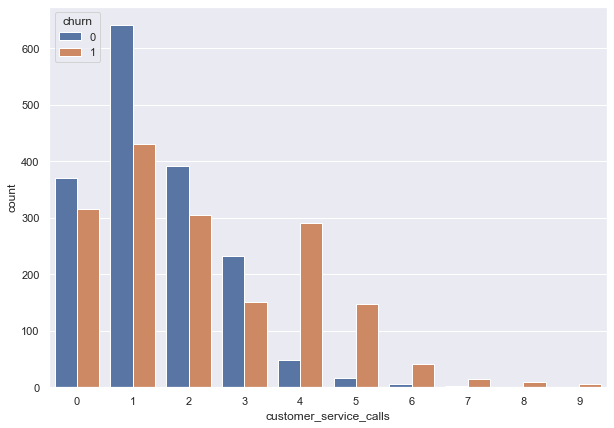

In [52]:
sns.countplot(x='customer_service_calls', hue='churn', data=df_sampled);

This graph indicates that customers leave the company at a higher rate after 3 customer service calls.

In [53]:
df_sampled.groupby('customer_service_calls')['churn'].value_counts()

customer_service_calls  churn
0                       0        371
                        1        316
1                       0        641
                        1        430
2                       0        391
                        1        304
3                       0        233
                        1        151
4                       1        291
                        0         49
5                       1        147
                        0         17
6                       1         42
                        0          5
7                       1         14
                        0          3
8                       1          9
9                       1          6
Name: churn, dtype: int64

In [54]:
print('The number of customers who made 3 or less customer service calls:', 
      len(df_sampled[df_sampled['customer_service_calls'] <= 3]))
print(round(df_sampled[df_sampled['customer_service_calls'] <= 3]['churn'].value_counts(normalize=True),2))
print(df_sampled[df_sampled['customer_service_calls'] <= 3]['churn'].value_counts())

print('----------------------------------------------------------------------')
print('The number of customers who made more than 3 customer service calls:', 
      len(df_sampled[df_sampled['customer_service_calls'] > 3]))
print(round(df_sampled[df_sampled['customer_service_calls'] > 3]['churn'].value_counts(normalize=True),2))
print(df_sampled[df_sampled['customer_service_calls'] > 3]['churn'].value_counts())


The number of customers who made 3 or less customer service calls: 2837
0    0.58
1    0.42
Name: churn, dtype: float64
0    1636
1    1201
Name: churn, dtype: int64
----------------------------------------------------------------------
The number of customers who made more than 3 customer service calls: 583
1    0.87
0    0.13
Name: churn, dtype: float64
1    509
0     74
Name: churn, dtype: int64


In [55]:
df_sampled[df_sampled['customer_service_calls'] > 0]['churn'].value_counts()

1    1394
0    1339
Name: churn, dtype: int64

*__Observations:__*

* Out of 3420 customers, 583 customers(17%) made more that 3 customer service calls and 509 of them (87%) left the company. 
* 83% of the customers made 3 or less customer service calls and 42% of them left the company.
* 80% of the customers made at least 1 customer service call.(1394 churn, 1339 nonchurn)


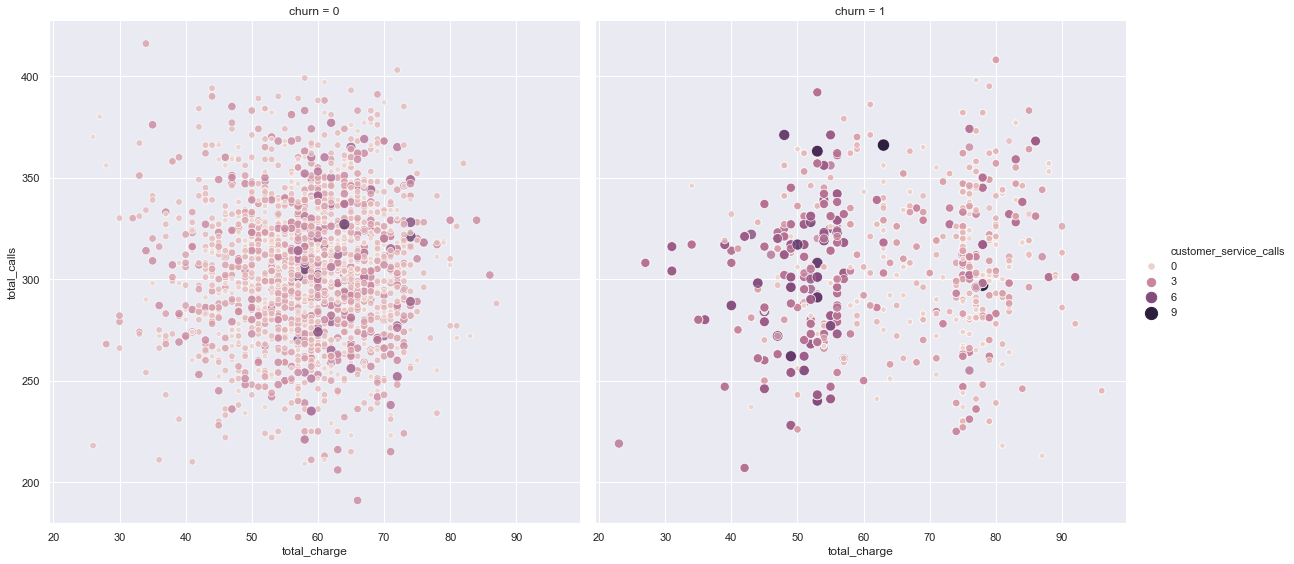

In [56]:
sns.relplot(x='total_charge', 
            y='total_calls', 
            hue='customer_service_calls', 
            col='churn', 
            data=df_sampled,                 
            alpha=0.8, 
            height=8, 
            size='customer_service_calls', 
            sizes=(30,150));


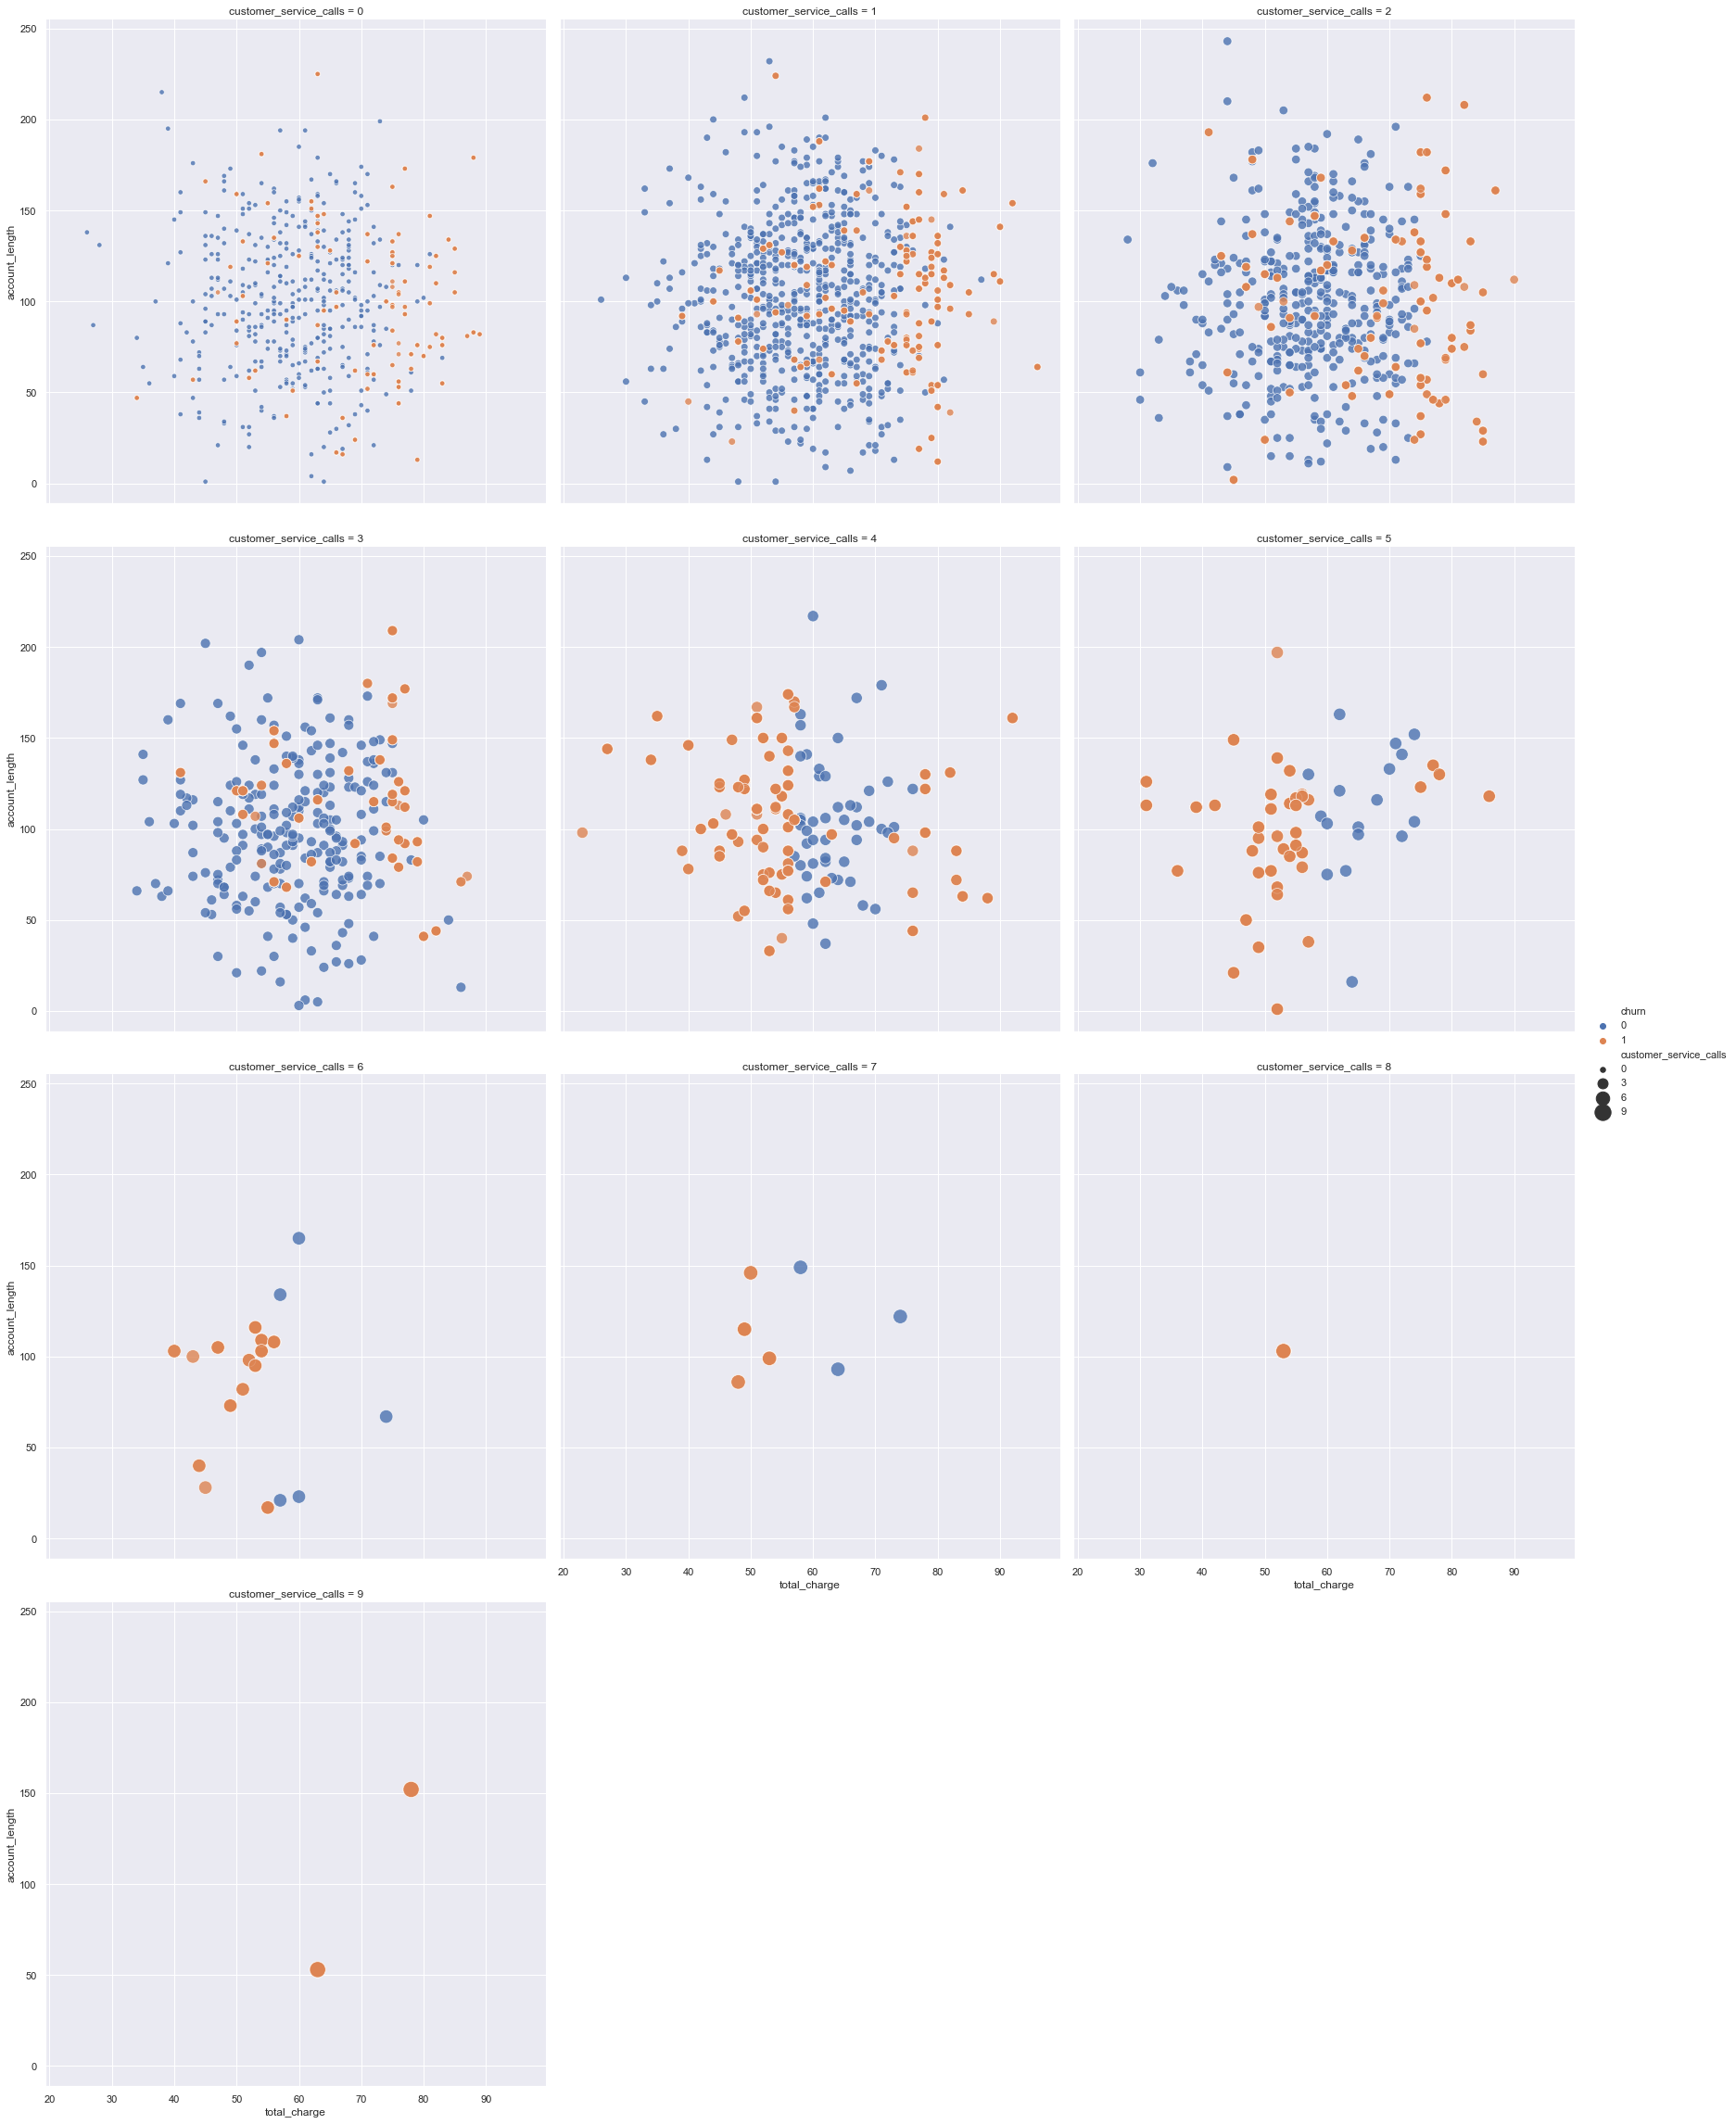

In [57]:
sns.relplot(x='total_charge', 
            y='account_length', 
            hue='churn', 
            col='customer_service_calls',
            col_wrap=3, 
            data=df_sampled,                 
            alpha=0.8, 
            height=8, 
            size='customer_service_calls', 
            sizes=(30,300));


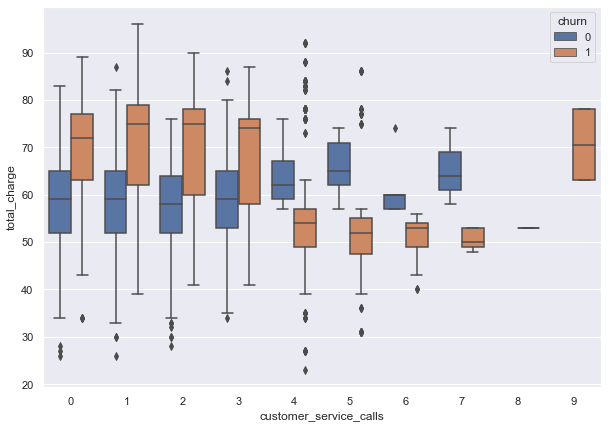

In [58]:
df_sampled_cs = df_sampled.copy()
df_sampled_cs['customer_service_calls'] = df_sampled_cs['customer_service_calls'].astype('object')
sns.boxplot(x='customer_service_calls', 
            y='total_charge', 
            data=df_sampled_cs, 
            hue='churn');

In [61]:
for i in range(0,len(df_sampled_cs)):
    if df_sampled['customer_service_calls'][i] <= 3:
        df_sampled_cs['customer_service_calls'][i] = '(0,1,2,3)_calls'
        
    elif df_sampled['customer_service_calls'][i] <= 7:
        df_sampled_cs['customer_service_calls'][i] = '(4,5,6,7)_calls'

    elif df_sampled['customer_service_calls'][i] <= 9:
        df_sampled_cs['customer_service_calls'][i] = '(8,9)_calls'

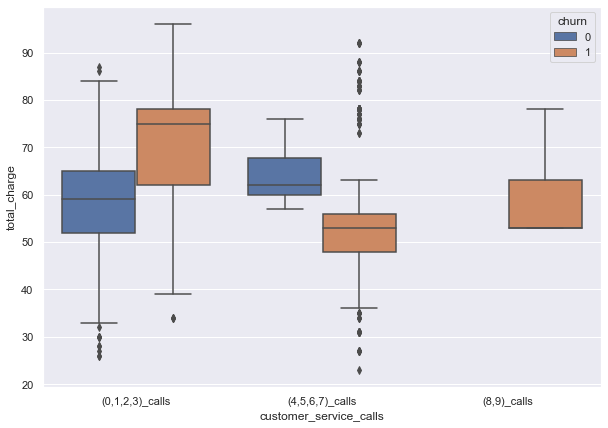

In [62]:
sns.boxplot(x='customer_service_calls', 
            y='total_charge', 
            data=df_sampled_cs, 
            hue='churn');

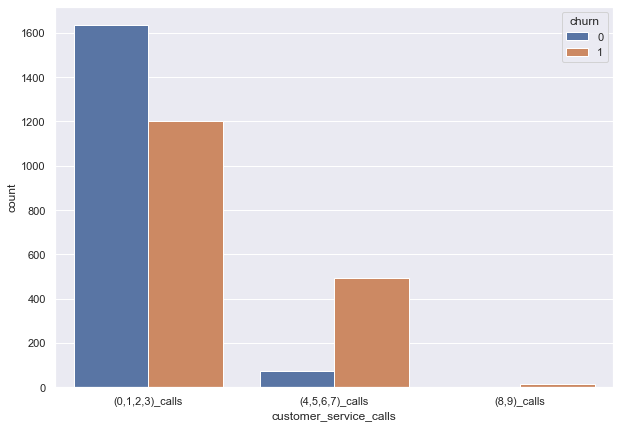

In [63]:
sns.countplot(x='customer_service_calls', hue='churn', data=df_sampled_cs);

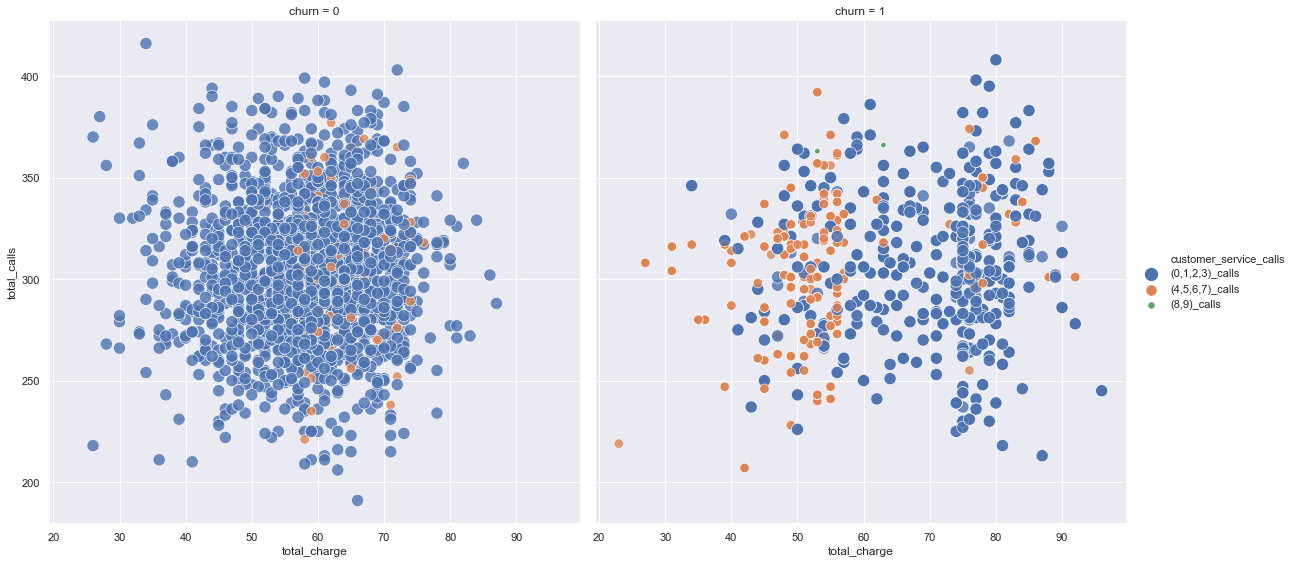

In [64]:
sns.relplot(x='total_charge', 
            y='total_calls', 
            hue='customer_service_calls', 
            col='churn', 
            data=df_sampled_cs,                 
            alpha=0.8, 
            height=8, 
            size='customer_service_calls', 
            sizes=(30,150));


### *CONCLUSION:*

* Customers churn at a higher rate once they make more than 3 customer service calls.
* Customers who more than 7 customer service calls churn.
* Customers who made 3 or less customer service calls tend to churn if their total charge is high. 
* Customers who made 3 or more customer service calls tend to churn even if their total charge is lower than average. 

--------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------

## SUMMARY

To summarize our conclusions:

 - Account length doesn't play a crucial role determining customer churn behavior.
 - International plan doesn't provide any advantages to the customers with the plan.(Only 10% of the customers have international plan.)
 - Customers cannot receive voicemail messages unless they are signed for voicemail plan.(28% of the customers have voicemail plan.) The number of the voicemail messages received almost follows a normal distribution with skews for both classes with a shift towards right for customers that churn data which indicates that the mean value is higher.
 - Customer churn rate is higher for customers who pay more in total. Total charge and total day charge have a linear relationship.
 - We can think of customers service calls as a measurement of customers satisfaction. The more the number of the phone calls made, the more often customers churn.
 - For the same amount of total charge, people will churn more often if the number of customer service calls higher.

--------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------